In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import OrdinalEncoder

In [2]:
power = pd.read_csv('database_IND.csv')

In [3]:
power

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
print(power['primary_fuel'].value_counts())

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


In [6]:
print(power['other_fuel1'].value_counts())

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


In [7]:
power['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [8]:
print(power['other_fuel3'].value_counts())

Series([], Name: other_fuel3, dtype: int64)


In [9]:
print(power['other_fuel3'].value_counts())

Series([], Name: other_fuel3, dtype: int64)


In [10]:
power['country'].value_counts()

IND    907
Name: country, dtype: int64

In [11]:
power['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [12]:
power['url']

0      http://www.nrel.gov/csp/solarpaces/project_det...
1                        http://www.ultratechcement.com/
2      https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...
3                                 http://www.cea.nic.in/
4                                 http://www.cea.nic.in/
                             ...                        
902                               http://www.cea.nic.in/
903                            http://karnatakapower.com
904    https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...
905                             http://www.hzlindia.com/
906    https://cdm.unfccc.int/Projects/DB/RWTUV134503...
Name: url, Length: 907, dtype: object

In [13]:
power['generation_data_source']

0                                NaN
1                                NaN
2                                NaN
3      Central Electricity Authority
4      Central Electricity Authority
                   ...              
902    Central Electricity Authority
903                              NaN
904                              NaN
905                              NaN
906                              NaN
Name: generation_data_source, Length: 907, dtype: object

In [14]:
power['year_of_capacity_data']

0         NaN
1         NaN
2         NaN
3      2019.0
4      2019.0
        ...  
902    2019.0
903       NaN
904       NaN
905       NaN
906       NaN
Name: year_of_capacity_data, Length: 907, dtype: float64

#### Missing values

In [15]:
# get the number of missing data points per column
missing_values_count = power.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

country           0
country_long      0
name              0
gppd_idnr         0
capacity_mw       0
latitude         46
longitude        46
primary_fuel      0
other_fuel1     709
other_fuel2     906
dtype: int64

In [16]:
# how many total missing values do we have?
total_cells = np.product(power.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

42.6518028502593


<AxesSubplot:>

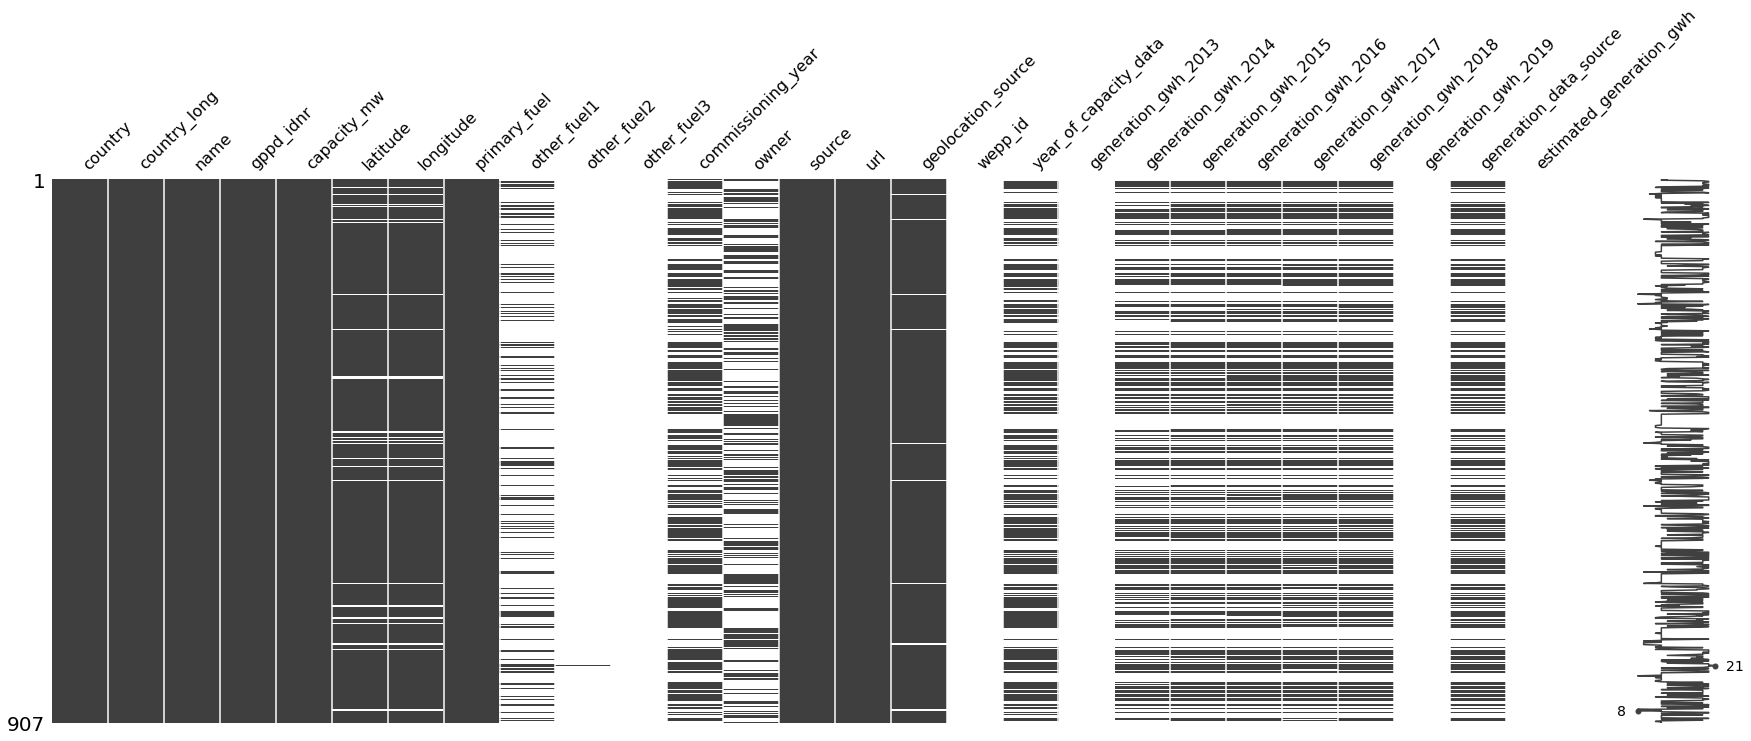

In [17]:
msno.matrix(power, figsize = (30,10))

In [18]:
numerical_features = []
categorical_features = []
#'country', 'country_long','primary_fuel', 'name', 'gppd_idnr', 'latitute', 'longitude', 'source', 'generation_data_source', 'owner', 'geolocation_source', 'wepp_id', 'generation_gwh_2019', 'estimated_generation_gwh', 'year_of_capacity_data' 
for i in power.columns:
    if power[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [19]:
power.loc[:,categorical_features].isnull().sum().sort_values(ascending=False)

other_fuel3                 907
wepp_id                     907
generation_gwh_2013         907
generation_gwh_2019         907
estimated_generation_gwh    907
other_fuel2                 906
other_fuel1                 709
generation_data_source      458
year_of_capacity_data       388
geolocation_source           19
country                       0
country_long                  0
dtype: int64

In [20]:
power.loc[:,numerical_features].isnull().sum().sort_values(ascending=False)

owner                  565
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
commissioning_year     380
latitude                46
longitude               46
name                     0
gppd_idnr                0
capacity_mw              0
primary_fuel             0
source                   0
url                      0
dtype: int64

In [21]:
power.drop(['country', 'country_long', 'name', 'gppd_idnr', 'latitude', 'longitude', 'source', 'generation_data_source', 'owner', 'geolocation_source', 'wepp_id', 'year_of_capacity_data', 'url' ], axis=1, inplace=True)

In [22]:
power.head()

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,2.5,Solar,NaN,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,NaN,NaN,2004.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,NaN
4,1800.0,Coal,Oil,NaN,NaN,2015.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,NaN


In [23]:
new_power = power[['capacity_mw','primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018','generation_gwh_2019', 'estimated_generation_gwh']].copy()

In [24]:
new_power

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,2.5,Solar,NaN,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,NaN,NaN,2004.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,NaN
4,1800.0,Coal,Oil,NaN,NaN,2015.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,NaN,NaN,2016.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,NaN
903,3.0,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
new_power[['other_fuel3']] = new_power[['other_fuel3']].astype(object)

In [26]:
new_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   capacity_mw               907 non-null    float64
 1   primary_fuel              907 non-null    object 
 2   other_fuel1               198 non-null    object 
 3   other_fuel2               1 non-null      object 
 4   other_fuel3               0 non-null      object 
 5   commissioning_year        527 non-null    float64
 6   generation_gwh_2013       0 non-null      float64
 7   generation_gwh_2014       398 non-null    float64
 8   generation_gwh_2015       422 non-null    float64
 9   generation_gwh_2016       434 non-null    float64
 10  generation_gwh_2017       440 non-null    float64
 11  generation_gwh_2018       448 non-null    float64
 12  generation_gwh_2019       0 non-null      float64
 13  estimated_generation_gwh  0 non-null      float64
dtypes: float64

In [27]:
new_power = new_power.drop(columns=['other_fuel3', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh', 'other_fuel2'])

In [28]:
new_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    object 
 2   other_fuel1          198 non-null    object 
 3   commissioning_year   527 non-null    float64
 4   generation_gwh_2014  398 non-null    float64
 5   generation_gwh_2015  422 non-null    float64
 6   generation_gwh_2016  434 non-null    float64
 7   generation_gwh_2017  440 non-null    float64
 8   generation_gwh_2018  448 non-null    float64
dtypes: float64(7), object(2)
memory usage: 63.9+ KB


In [29]:
numerical_features1 = []
categorical_features1 = []
#'country', 'country_long','primary_fuel', 'name', 'gppd_idnr', 'latitute', 'longitude', 'source', 'generation_data_source', 'owner', 'geolocation_source', 'wepp_id', 'generation_gwh_2019', 'estimated_generation_gwh', 'year_of_capacity_data' 
for i in new_power.drop('primary_fuel' , axis=1).columns:
    if new_power[i].nunique()>7:
        numerical_features1.append(i)
    else:
        categorical_features1.append(i)

In [30]:
new_power.loc[:,categorical_features1].isnull().sum().sort_values(ascending=False)

other_fuel1    709
dtype: int64

In [31]:
new_power.loc[:,numerical_features1].isnull().sum().sort_values(ascending=False)


generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
commissioning_year     380
capacity_mw              0
dtype: int64

new_power.drop(['other_fuel3', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh'], axis=1, inplace=True)

In [32]:
categorical_features1

['other_fuel1']

In [33]:
to_encode = [feat for feat in categorical_features1 if new_power[feat].dtype=='object']

In [34]:
to_encode


['other_fuel1']

In [35]:
ode = OrdinalEncoder(dtype = int)

In [36]:
def encode(data):
    '''function to encode non-nan data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = ode.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in to_encode:
    encode(new_power[columns])

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
new_power.loc[:, categorical_features1].head(10)

,other_fuel1
0,NaN
1,NaN
2,NaN
3,NaN
4,2
5,2
6,NaN
7,NaN
8,NaN
9,2


In [38]:
X = new_power.drop('primary_fuel', axis=1)

In [39]:
X_train = X.loc[:300,]
X_test = X.loc[300:,]

Due to the great quantity of missing values, I explored some more advanced options for imputation, and thats how I came across the libraries fancyimpute and impyute

These resources heavily inspired the solution: 
* https://www.kaggle.com/code/chayan8/missing-value-imputation-using-mice-knn-ckd-data/notebook
    

### Imputing numerical values

In [40]:
from impyute.imputation.cs import mice

In [41]:
# MICE requires float values
X_train_numerical = X_train.loc[:,numerical_features1].astype('float64')

In [42]:
# Passing the numpy arrays to mice
X_train_numerical_imputed = mice(X_train_numerical.values)

In [43]:
X_train.loc[:,numerical_features1].isna().sum().sort_values(ascending=False)

generation_gwh_2014    181
generation_gwh_2015    169
generation_gwh_2016    167
generation_gwh_2017    163
generation_gwh_2018    162
commissioning_year     137
capacity_mw              0
dtype: int64

In [44]:
X_train.loc[:,numerical_features1] = X_train_numerical_imputed

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [45]:
X_train.loc[:,numerical_features1].isna().sum().sort_values(ascending=False)

capacity_mw            0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

*****************************************************************************************************

### Imputing categorical values

In [46]:
from fancyimpute import KNN

In [47]:
imputer = KNN()

In [48]:
X_train_imputed = pd.DataFrame(np.round(imputer.fit_transform(X_train)),columns = X_train.columns)

Imputing row 1/301 with 1 missing, elapsed time: 0.020
Imputing row 101/301 with 1 missing, elapsed time: 0.022
Imputing row 201/301 with 1 missing, elapsed time: 0.024
Imputing row 301/301 with 1 missing, elapsed time: 0.025


In [49]:
X_train_imputed.isnull().sum()

capacity_mw            0
other_fuel1            0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [50]:
X_train_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,301.0,259.764120,445.752473,1.0,19.0,54.0,300.0,2920.0
other_fuel1,301.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
commissioning_year,301.0,1996.272425,11.966016,1957.0,1993.0,1993.0,2004.0,2018.0
generation_gwh_2014,301.0,1662.903654,1630.167288,-493.0,793.0,1716.0,1725.0,12467.0
generation_gwh_2015,301.0,1547.867110,1671.057213,0.0,844.0,1332.0,1382.0,11440.0
generation_gwh_2016,301.0,1676.262458,1828.106786,0.0,933.0,1471.0,1508.0,13675.0
generation_gwh_2017,301.0,1786.700997,1882.958515,0.0,859.0,1644.0,1671.0,15335.0
generation_gwh_2018,301.0,1729.893688,2095.244023,0.0,905.0,1444.0,1505.0,18698.0


In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()
scaler.fit(X_train_imputed)
X_train_scaled = scaler.transform(X_train_imputed)

In [53]:
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns = X_train.columns)

In [54]:
X_train_scaled.describe()

,capacity_mw,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,301.000000,301.0,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.088648,0.0,0.643810,0.166351,0.135303,0.122579,0.116511,0.092518
std,0.152707,0.0,0.196164,0.125785,0.146071,0.133682,0.122788,0.112057
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006166,0.0,0.590164,0.099228,0.073776,0.068227,0.056016,0.048401
50%,0.018157,0.0,0.590164,0.170448,0.116434,0.107569,0.107206,0.077228
75%,0.102432,0.0,0.770492,0.171142,0.120804,0.110274,0.108966,0.080490
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
X_train_scaled

,capacity_mw,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.000343,0.0,0.885246,0.147840,0.105332,0.102962,0.105119,0.074607
1,0.033231,0.0,0.606557,0.169367,0.123077,0.112834,0.110466,0.082415
2,0.013018,0.0,0.590164,0.170525,0.118619,0.109324,0.108249,0.078725
3,0.045906,0.0,0.770492,0.085725,0.073776,0.064790,0.043300,0.033480
4,0.616307,0.0,0.950820,0.272299,0.517133,0.456527,0.351223,0.389293
...,...,...,...,...,...,...,...,...
296,0.032545,0.0,0.950820,0.026389,0.006556,0.029543,0.026345,0.021821
297,0.410757,0.0,0.868852,0.573688,0.668357,0.443364,0.398435,0.393197
298,0.004796,0.0,0.590164,0.170910,0.116871,0.107861,0.107401,0.077228
299,0.000343,0.0,0.590164,0.171219,0.115822,0.107130,0.106880,0.076372


### Test Data

In [56]:
# MICE requires float values
X_test_numerical = X_test.loc[:,numerical_features1].astype('float64')

In [57]:
X_test

,capacity_mw,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
300,91.80,NaN,1994.043714,1703.746947,1402.847670,1538.391042,1690.579605,1533.492455
301,10.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,29.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,33.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,10.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
902,1600.00,2,2016.000000,NaN,0.994875,233.596650,865.400000,686.500000
903,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
X_test_numerical_imputed = mice(X_test_numerical.values)
X_test.loc[:,numerical_features1] = X_test_numerical_imputed

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [59]:
X_test_imputed = pd.DataFrame(np.round(imputer.fit_transform(X_test)),columns = X_test.columns)

Imputing row 1/607 with 1 missing, elapsed time: 0.071
Imputing row 101/607 with 1 missing, elapsed time: 0.073
Imputing row 201/607 with 1 missing, elapsed time: 0.075
Imputing row 301/607 with 1 missing, elapsed time: 0.077
Imputing row 401/607 with 0 missing, elapsed time: 0.079
Imputing row 501/607 with 1 missing, elapsed time: 0.081
Imputing row 601/607 with 1 missing, elapsed time: 0.083


In [60]:
scaler.fit(X_test_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [61]:
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns = X_test.columns)

In [62]:
X_test_scaled

,capacity_mw,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.019328,1.0,0.736264,0.093768,0.076865,0.051241,0.050911,0.049259
1,0.002101,0.5,0.670330,0.107384,0.103859,0.066300,0.052786,0.052428
2,0.006303,0.5,0.681319,0.107761,0.104144,0.066933,0.053609,0.053418
3,0.006933,0.5,0.681319,0.107830,0.104208,0.067033,0.053751,0.053588
4,0.002101,0.5,0.670330,0.107350,0.103859,0.066267,0.052757,0.052399
...,...,...,...,...,...,...,...,...
602,0.336134,1.0,0.978022,0.062832,0.032444,0.007796,0.027458,0.025294
603,0.000630,0.5,0.670330,0.107213,0.103732,0.066034,0.052445,0.052031
604,0.005462,0.5,0.681319,0.107659,0.104081,0.066800,0.053439,0.053220
605,0.016807,0.5,0.681319,0.108756,0.104936,0.068599,0.055795,0.056049


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9

In [74]:
new_power["primary_fuel"].replace({"Coal": 0, "Hydro": 1, "Solar": 2, "Wind": 3, "Gas": 4, "Biomass": 5, "Oil": 6, "Nuclear": 7}, inplace=True)

In [75]:
y = new_power['primary_fuel']

In [76]:
y

0      2
1      0
2      3
3      4
4      0
      ..
902    0
903    2
904    3
905    0
906    3
Name: primary_fuel, Length: 907, dtype: int64

In [106]:
y_test = y.iloc[301:907]

In [107]:
y_test

301    3
302    3
303    3
304    3
305    1
      ..
902    0
903    2
904    3
905    0
906    3
Name: primary_fuel, Length: 606, dtype: int64

In [108]:
y_train =y.iloc[0:301]

In [109]:
y_train

0      2
1      0
2      3
3      4
4      0
      ..
296    1
297    0
298    2
299    2
300    3
Name: primary_fuel, Length: 301, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [111]:
#evaluation - baselines
num_folds = 10
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f %f " % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR 0.348710 0.064527 
KNN 0.571613 0.060625 
CART 0.554946 0.067546 
SVM 0.468387 0.061680 
